# Visualizing Model Output

#### Overview
In this notebook, we will work to visualize the results of the `tutorial_global_oce_latlon` experiment that we ran on Spartan.

#### Import Modules
First, import the modules required to access read data, create plots, and generate movies:

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

After the modules are loaded in, establish a path to the directory for this week's class:

In [3]:
# Define a path to this lesson's folder
lesson_folder = '/Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/'

## Visualizing Model Fields

A first step in visualizing model output is to plot a single model field. Here, let's start with the zonal velocity field `UVEL`. Let's read in one of those fields here:

In [4]:
# provide a path to the data file
zonal_file = os.path.join(lesson_folder, 'run', 'diags', 'UVEL', 'UVEL.0000000365.data')

# read in the file and reshape it to the proper dimensions
n_rows = 40  #sNy
n_cols = 90 #sNx
nz = 15
u_grid = np.fromfile(zonal_file, '>f4').reshape((n_rows, n_cols))

Next, let's plot the data on a figure with a colorbar:

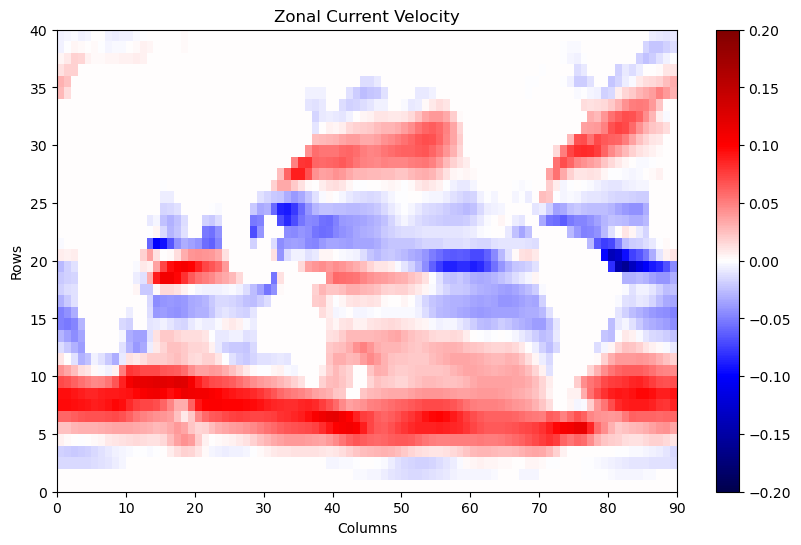

In [5]:
# make a figure object
fig = plt.figure(figsize = (10,6))

# plot the field
C = plt.pcolormesh(u_grid, cmap='seismic', vmin=-0.2, vmax=0.2)

# add a colorbar
plt.colorbar(C)

# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Current Velocity')
plt.show()

### Masking Model Field

The model fields from MITgcm will be 0 when the cells are on land. When plotting MITgcm fields, it's usually a good idea to mask out the land points. This can be done using the "hFac" fields of the model. The field stored in `hFacC.data` is for tracer values, the field in `hFacW.data` is for zonal values, and the field in `hFacS.data` is for meridional values. 

When starting a model from `nIter=0` as we did here, the model will also output these grids. Download those fields to your local run directory and read them in here:

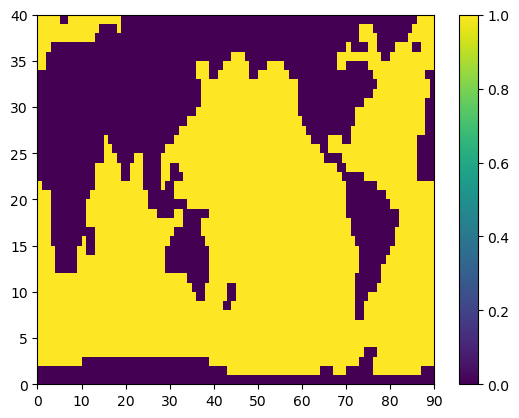

In [10]:
# define a path to the hFacW grid file
hfacw_file = os.path.join(lesson_folder, 'run', 'hFacW.data')

# reshape the hFac field as appropriate
hfacw_grid = np.fromfile(hfacw_file, '>f4').reshape((15, n_rows, n_cols))

# plot 
plt.pcolormesh(hfacw_grid[0, :, :])
plt.colorbar()
plt.show()

The hfac grid can be used to mask the plotting field using numpy:

In [11]:
# create a masked version of the uvel field
masked_uvel = np.ma.masked_where(hfacw_grid[0, :, :]==0, u_grid)

Let's see what that looks like:

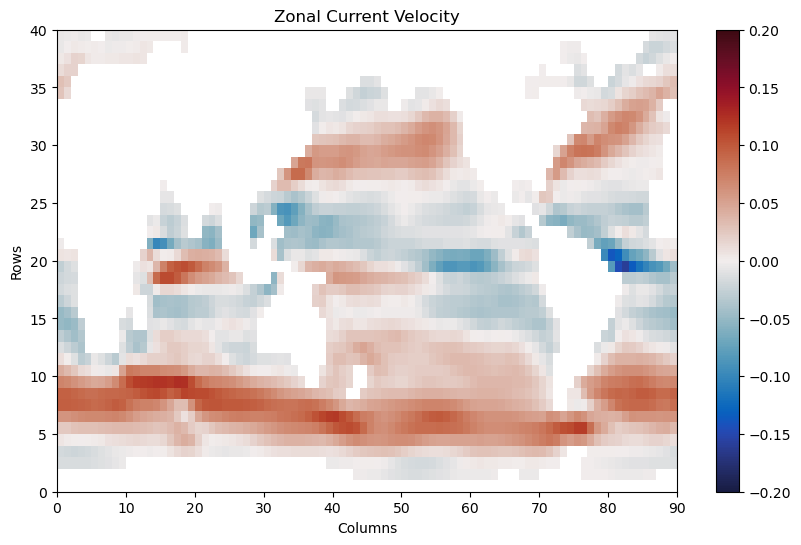

In [13]:
# make a figure object
fig = plt.figure(figsize = (10,6))

# plot the field
C = plt.pcolormesh(masked_uvel, cmap=cm.balance, vmin=-0.2, vmax=0.2)

# add a colorbar
plt.colorbar(C)

# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Current Velocity')
plt.show()

As we can see, this distinguishes the land parts of the domain from the rest of the figure.

### &#x1F914; Try it for yourself
Make equivalent plots for `THETA`, `SALT`, and `VVEL`. Try out different time steps to see how the fields are evolving through the simulation.

## Stitching Figures into Movies
Above, hopefully you noticed that the velocity fields looked quite different depending on where/when we were plotting the fields. It is often useful to create a movie with the data so you can observe how the model is evolving.

To create a movie, first we will create a function called `plot_frame` to make a figure of data given a path to the data and a file path for the saved image. Below, we will use this function in a loop to generate a plot for each individual file and then we will stitch these together into a movie. Let's create that function here

In [38]:
# define a plot_frame function which takes in two arguments:
#    - the file path of a uvel file to read
#    - the file path where the plot will be stored
def plot_frame(data_path, image_path): 

    fig = plt.figure(figsize = (10,6))

    u_grid = np.fromfile(data_path, '>f4').reshape((n_rows, n_cols))
    # plot the field
    # plt.pcolormesh(u_grid, cmap='seismic', vmin=-0.2, vmax=0.2)
    # plt.pcolormesh(u_grid, cmap='seismic', vmin=30, vmax=37)
    plt.pcolormesh(u_grid, cmap='turbo', vmin=-5, vmax=35)
    
    # add a colorbar
    plt.colorbar(label='m/s')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    plt.title('Zonal Current Velocity')
    
    # show the figure
    plt.savefig(image_path)
    plt.close(fig)

Now that the function is defined, let's loop through all of the daily outputs of our data to make panels for a movie:

In [39]:
# make a list that will hold the paths
file_list = []

# loop through each day of the year
for day in range(1, 366):

    # identify the data file path
    data_path = os.path.join(lesson_folder, 'run', 'diags', 'THETA', 'THETA.'+'{:010d}'.format(day)+'.data')
    

    # identify the image file path
    image_path = os.path.join(lesson_folder, 'plots', 'THETA', 'THETA.'+'{:010d}'.format(day)+'.png')
    

    # call the plotting function
    plot_frame(data_path, image_path)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)

With our frames constructed, we can now stitch them together into a movie! With the `moviepy` module, this is fairly straight-forward:

In [40]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(lesson_folder, 'plots', 'THETA.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/plots/THETA.mp4.
Moviepy - Writing video /Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/plots/THETA.mp4



Moviepy - Done !
Moviepy - video ready /Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/plots/THETA.mp4


### &#x1F914; Try it for yourself
Make a movie which shows the following plots in a 2x2 grid: `THETA`, `SALT`, `UVEL`, `VVEL`.

In [1]:
import matplotlib.ticker as mticker

# make a figure object with projection
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude = 30))

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20))
# format the axes
plt.show()

NameError: name 'plt' is not defined